In [52]:
#Imports

import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch,VerticalPitch
import seaborn as sns


In [53]:
df = pd.read_csv(r'C:\Users\Feele\Documents\Data\Sunderland\heatfilter.csv')

In [54]:
df.head()

,Unnamed: 0,id,minute,second,teamId,x,y,endX,endY,period/value,...,qualifiers/4/type/displayName,qualifiers/5/type/displayName,qualifiers/6/type/displayName,qualifiers/7/type/displayName,qualifiers/8/type/displayName,qualifiers/9/type/displayName,qualifiers/10/type/displayName,qualifiers/11/type/displayName,qualifiers/12/type/displayName,qualifiers/13/type/displayName
0,2,2393044241,0,6.0,16,22.6,46.4,45.5,49.9,1,...,Length,HeadPass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,2393044325,0,12.0,16,29.1,64.8,40.7,67.8,1,...,PassEndX,HeadPass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,2393044433,0,14.0,16,29.1,71.8,40.4,72.3,1,...,PassEndX,Zone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,2393044443,0,16.0,16,40.4,72.3,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,2393044535,0,20.0,16,10.4,59.7,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df['name'].value_counts(dropna = False)

Wright        114
Cirkin         90
Clarke         79
Matete         69
Winchester     69
Evans          69
Patterson      48
ONien          41
Stewart        39
Gooch          35
Neil           29
Dajaku         25
Roberts        24
Defoe          13
Name: name, dtype: int64

In [56]:
df = df[df['name']=='Wright']

#df = df[df['name'].isin(['Cirkin','Flanagan','Doyle','Wright','Winchester'])]

In [57]:
# Inflating X and Y to pitchsize

df['x'] = df['x']*1.2
df['endX'] = df['endX']*1.2
df['y'] = df['y']*.8
df['endY'] = df['endY']*.8

In [58]:
df1 = df[df['minute']<=15] 
df2 = df[(df['minute'] >=16 ) & (df['minute'] <31)] 
df3 = df[(df['minute'] >=31 ) & (df['minute'] <46)] 
df4 = df[(df['minute'] >=46 ) & (df['minute'] <61)] 
df5 = df[(df['minute'] >=61 ) & (df['minute'] <76)] 
df6 = df[df['minute']>=76]
df7 = df[df['period/value']==1] 
df8 = df[df['period/value']==2]


### Colour chat for heat map 

https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

In [59]:
pitch = Pitch(pitch_type='statsbomb',
              line_color='black',
              pitch_color='white')

In [60]:
font1 = {'family':'Consolas','color':'black','size':24}

C:\Users\Feele\Documents\Analytics\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


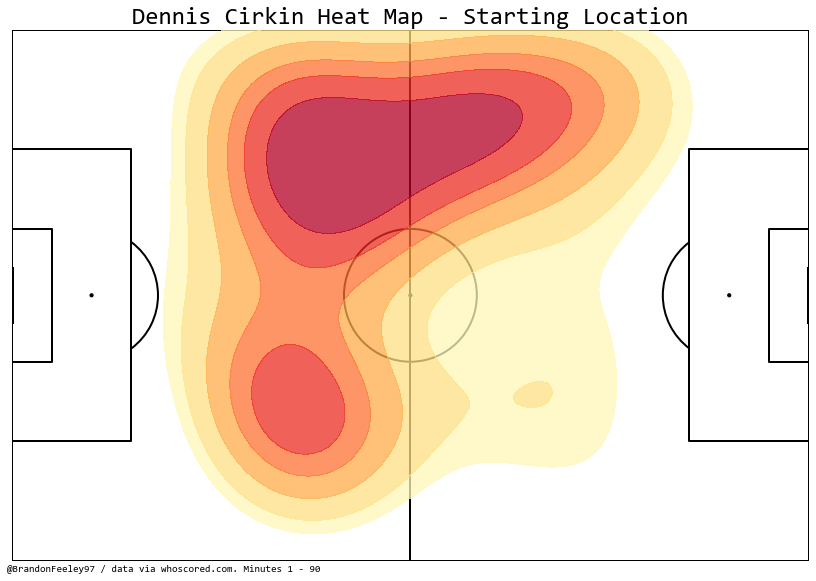

In [62]:
fig,ax = pitch.draw(figsize=(16,8))
plt.gca().invert_yaxis()


##### HEAT MAP ADDITION ####

kde = sns.kdeplot(
        df['endX'],
        df['endY'],
        shade =True,
        thresh=.3,
        alpha=.75,
        n_levels=7,
        cmap = 'YlOrRd',
        #cbar = 'True'
)

#Limited Heat Map to edges
plt.xlim(0,120)
plt.ylim(0,80) 

plt.title("Dennis Cirkin Heat Map - Starting Location",fontdict = font1) # Title


line1 = 'Minutes Played 1 - 90'

#fig.text(.425,.925,"Minutes Played 1 - 90",font='Consolas',fontsize=12, color="black")
fig.text(.15,0,"@BrandonFeeley97 / data via whoscored.com. Minutes 1 - 90", font='Consolas')

plt.savefig('heat1.png',dpi=500) 